In [73]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Read data.
games = pandas.read_csv("games.csv")
# Print the names of the columns in games.
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


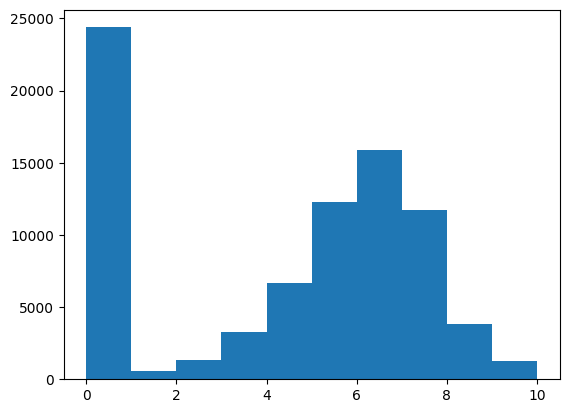

In [74]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

In [75]:
# Print the first row of all the games with zero scores.
# The .iloc method on dataframes allows us to index by position.
games.drop('type', axis=1, inplace=True)
games.drop('name', axis=1, inplace=True)
print(games[games["average_rating"] == 0].iloc[0])
# Print the first row of all the games with scores greater than 0.
print(games[games["average_rating"] > 0].iloc[0])

id                      318.0
yearpublished             0.0
minplayers                0.0
maxplayers                0.0
playingtime               0.0
minplaytime               0.0
maxplaytime               0.0
minage                    0.0
users_rated               0.0
average_rating            0.0
bayes_average_rating      0.0
total_owners              0.0
total_traders             0.0
total_wanters             0.0
total_wishers             1.0
total_comments            0.0
total_weights             0.0
average_weight            0.0
Name: 13048, dtype: float64
id                      12333.00000
yearpublished            2005.00000
minplayers                  2.00000
maxplayers                  2.00000
playingtime               180.00000
minplaytime               180.00000
maxplaytime               180.00000
minage                     13.00000
users_rated             20113.00000
average_rating              8.33774
bayes_average_rating        8.22186
total_owners            26647.00000


<function matplotlib.pyplot.show(close=None, block=None)>

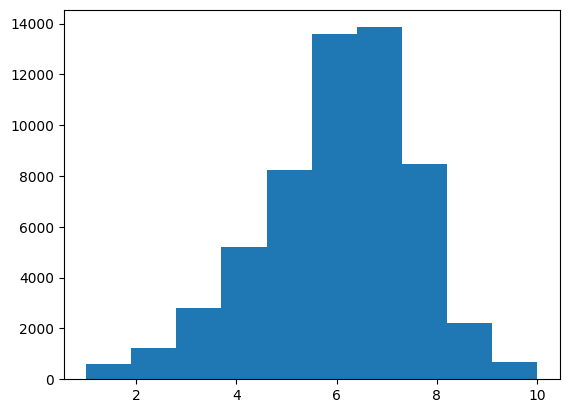

In [76]:
#Remove the data that can impact our model negative
#Remove any rows without user reviews
games  = games[games["users_rated"] > 0] #if even 1 person reviewed we assume it is okay

#Remove any rows with missing values.
games = games.dropna(axis=0)

#Make histogram of all average ratings

plt.hist(games["average_rating"])
plt.show

<Axes: >

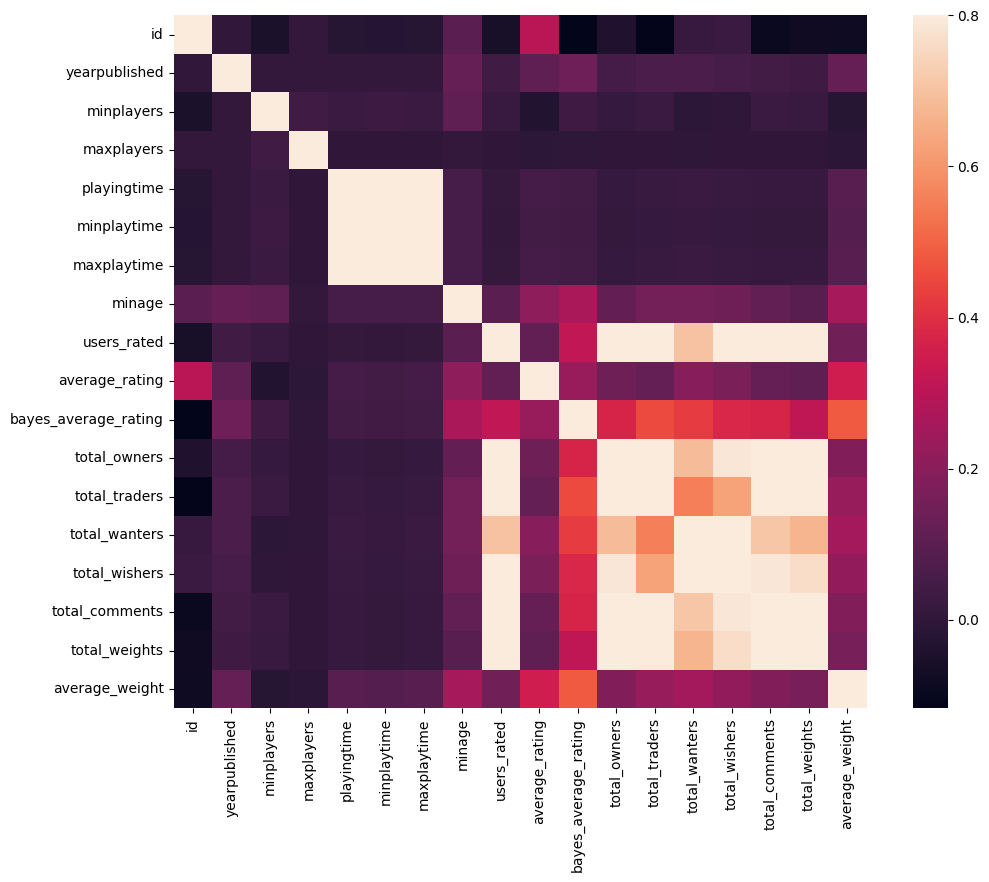

In [77]:
#Correlation matrix

corrmat = games.corr() #pandas dataframe
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8, square = True)

In [78]:
# Get all the columns from the dataframe.
columns = games.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "id"]]

# Store the variable we'll be predicting on.
target = "average_rating"

In [79]:
# Generate the training set.  Set random_state to be able to replicate results.
train = games.sample(frac=0.8, random_state=1)

# Select anything not in the training set and put it in the testing set.
test = games.loc[~games.index.isin(train.index)]

# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(45544, 18)
(11386, 18)


In [85]:
# Import the linear regression model.
from sklearn.linear_model import LinearRegression
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error #mean sqared = avg. distance between each pred and label

# Initialize the model class.
LR_model = LinearRegression()
# Fit the model to the training data.
LR_model.fit(train[columns], train[target])

LinearRegression()

In [86]:
# Generate our predictions for the test set.
predictions = LR_model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

2.103797921768406

In [87]:
# Import the random forest nonlinear model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
RF_model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
RF_model.fit(train[columns], train[target])

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [88]:
# Make predictions.
predictions = RF_model.predict(test[columns])
# Compute the error.
mean_squared_error(predictions, test[target])

1.460076489751318

In [105]:
test[columns].iloc[1]

yearpublished      2008.0000
minplayers            1.0000
maxplayers            5.0000
playingtime         200.0000
minplaytime         100.0000
maxplaytime         200.0000
minage               12.0000
users_rated       15774.0000
total_owners      16429.0000
total_traders       205.0000
total_wanters      1343.0000
total_wishers      5149.0000
total_comments     3458.0000
total_weights      1450.0000
average_weight        3.7531
Name: 14, dtype: float64

In [110]:
#let's test both of our model's prediction only on the first game
LR_rating = LR_model.predict(test[columns].iloc[[0]])
RF_rating = RF_model.predict(test[columns].iloc[[0]])
#actual value
real_rating = test[target].iloc[0]
print(real_rating)

#predictions
print(LR_rating)
print(RF_rating)

8.07933
[8.10163107]
[7.94222312]
